# 导入模块

In [1]:
import warnings
import pandas as pd
import seaborn as sns
from toad.detector import detect
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option("display.width", 10000)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# 加载数据

In [2]:
train = pd.read_csv("../data/cs-training.csv", encoding="utf-8")
train.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
test = pd.read_csv("../data/cs-test.csv", encoding="utf-8")
test.rename(columns={"Unnamed: 0": "Id"}, inplace=True)

# 数据探索

## 查看前五行

### 训练集

In [3]:
train.head()

Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
0   1                 1                              0.766127   45                                     2   0.802982         9120.0                               13                        0                             6                                     0                 2.0
1   2                 0                              0.957151   40                                     0   0.121876         2600.0                                4                        0                             0                                     0                 1.0
2   3                 0                              0.658180   38                                     1   0.085113         3042.0                                2                        1                             0                                     0                 0.0
3   4                 0                              0.233810   30                                     0   0.036050         3300.0                                5                        0                             0                                     0                 0.0
4   5                 0                              0.907239   49                                     1   0.024926        63588.0                                7                        0                             1                                     0                 0.0

### 测试集

In [4]:
test.head()

Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
0   1               NaN                              0.885519   43                                     0   0.177513         5700.0                                4                        0                             0                                     0                 0.0
1   2               NaN                              0.463295   57                                     0   0.527237         9141.0                               15                        0                             4                                     0                 2.0
2   3               NaN                              0.043275   59                                     0   0.687648         5083.0                               12                        0                             1                                     0                 2.0
3   4               NaN                              0.280308   38                                     1   0.925961         3200.0                                7                        0                             2                                     0                 0.0
4   5               NaN                              1.000000   27                                     0   0.019917         3865.0                                4                        0                             0                                     0                 1.0

## 查看数据类型、大小和唯一值

### 训练集

In [12]:
detect(train).iloc[:, :4]

type    size missing  unique
Id                                      int64  150000   0.00%  150000
SeriousDlqin2yrs                        int64  150000   0.00%       2
RevolvingUtilizationOfUnsecuredLines  float64  150000   0.00%  125728
age                                     int64  150000   0.00%      86
NumberOfTime30-59DaysPastDueNotWorse    int64  150000   0.00%      16
DebtRatio                             float64  150000   0.00%  114194
MonthlyIncome                         float64  150000  19.82%   13594
NumberOfOpenCreditLinesAndLoans         int64  150000   0.00%      58
NumberOfTimes90DaysLate                 int64  150000   0.00%      19
NumberRealEstateLoansOrLines            int64  150000   0.00%      28
NumberOfTime60-89DaysPastDueNotWorse    int64  150000   0.00%      13
NumberOfDependents                    float64  150000   2.62%      13

### 测试集

In [13]:
detect(test).iloc[:, :4]

type    size  missing  unique
Id                                      int64  101503    0.00%  101503
SeriousDlqin2yrs                      float64  101503  100.00%       0
RevolvingUtilizationOfUnsecuredLines  float64  101503    0.00%   85716
age                                     int64  101503    0.00%      82
NumberOfTime30-59DaysPastDueNotWorse    int64  101503    0.00%      16
DebtRatio                             float64  101503    0.00%   79878
MonthlyIncome                         float64  101503   19.81%   11976
NumberOfOpenCreditLinesAndLoans         int64  101503    0.00%      56
NumberOfTimes90DaysLate                 int64  101503    0.00%      18
NumberRealEstateLoansOrLines            int64  101503    0.00%      24
NumberOfTime60-89DaysPastDueNotWorse    int64  101503    0.00%      12
NumberOfDependents                    float64  101503    2.59%      13

## 数据形状

### 训练集

In [7]:
train.shape

(150000, 12)

### 测试集

In [8]:
test.shape

(101503, 12)

## 描述性统计

### 训练集

In [14]:
train.describe().T

count          mean           std  min           25%           50%            75%        max
Id                                    150000.0  75000.500000  43301.414527  1.0  37500.750000  75000.500000  112500.250000   150000.0
SeriousDlqin2yrs                      150000.0      0.066840      0.249746  0.0      0.000000      0.000000       0.000000        1.0
RevolvingUtilizationOfUnsecuredLines  150000.0      6.048438    249.755371  0.0      0.029867      0.154181       0.559046    50708.0
age                                   150000.0     52.295207     14.771866  0.0     41.000000     52.000000      63.000000      109.0
NumberOfTime30-59DaysPastDueNotWorse  150000.0      0.421033      4.192781  0.0      0.000000      0.000000       0.000000       98.0
DebtRatio                             150000.0    353.005076   2037.818523  0.0      0.175074      0.366508       0.868254   329664.0
MonthlyIncome                         120269.0   6670.221237  14384.674215  0.0   3400.000000   5400.000000    8249.000000  3008750.0
NumberOfOpenCreditLinesAndLoans       150000.0      8.452760      5.145951  0.0      5.000000      8.000000      11.000000       58.0
NumberOfTimes90DaysLate               150000.0      0.265973      4.169304  0.0      0.000000      0.000000       0.000000       98.0
NumberRealEstateLoansOrLines          150000.0      1.018240      1.129771  0.0      0.000000      1.000000       2.000000       54.0
NumberOfTime60-89DaysPastDueNotWorse  150000.0      0.240387      4.155179  0.0      0.000000      0.000000       0.000000       98.0
NumberOfDependents                    146076.0      0.757222      1.115086  0.0      0.000000      0.000000       1.000000       20.0

### 测试集

In [10]:
test.describe()

Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
count  101503.000000               0.0                         101503.000000  101503.000000                         101503.000000  101503.000000   8.140000e+04                    101503.000000            101503.000000                 101503.000000                         101503.000000        98877.000000
mean    50752.000000               NaN                              5.310000      52.405436                              0.453770     344.475020   6.855036e+03                         8.453514                 0.296691                      1.013074                              0.270317            0.769046
std     29301.536524               NaN                            196.156039      14.779756                              4.538487    1632.595231   3.650860e+04                         5.144100                 4.515859                      1.110253                              4.503578            1.136778
min         1.000000               NaN                              0.000000      21.000000                              0.000000       0.000000   0.000000e+00                         0.000000                 0.000000                      0.000000                              0.000000            0.000000
25%     25376.500000               NaN                              0.030131      41.000000                              0.000000       0.173423   3.408000e+03                         5.000000                 0.000000                      0.000000                              0.000000            0.000000
50%     50752.000000               NaN                              0.152586      52.000000                              0.000000       0.364260   5.400000e+03                         8.000000                 0.000000                      1.000000                              0.000000            0.000000
75%     76127.500000               NaN                              0.564225      63.000000                              0.000000       0.851619   8.200000e+03                        11.000000                 0.000000                      2.000000                              0.000000            1.000000
max    101503.000000               NaN                          21821.000000     104.000000                             98.000000  268326.000000   7.727000e+06                        85.000000                98.000000                     37.000000                             98.000000           43.000000

## 相关性分析

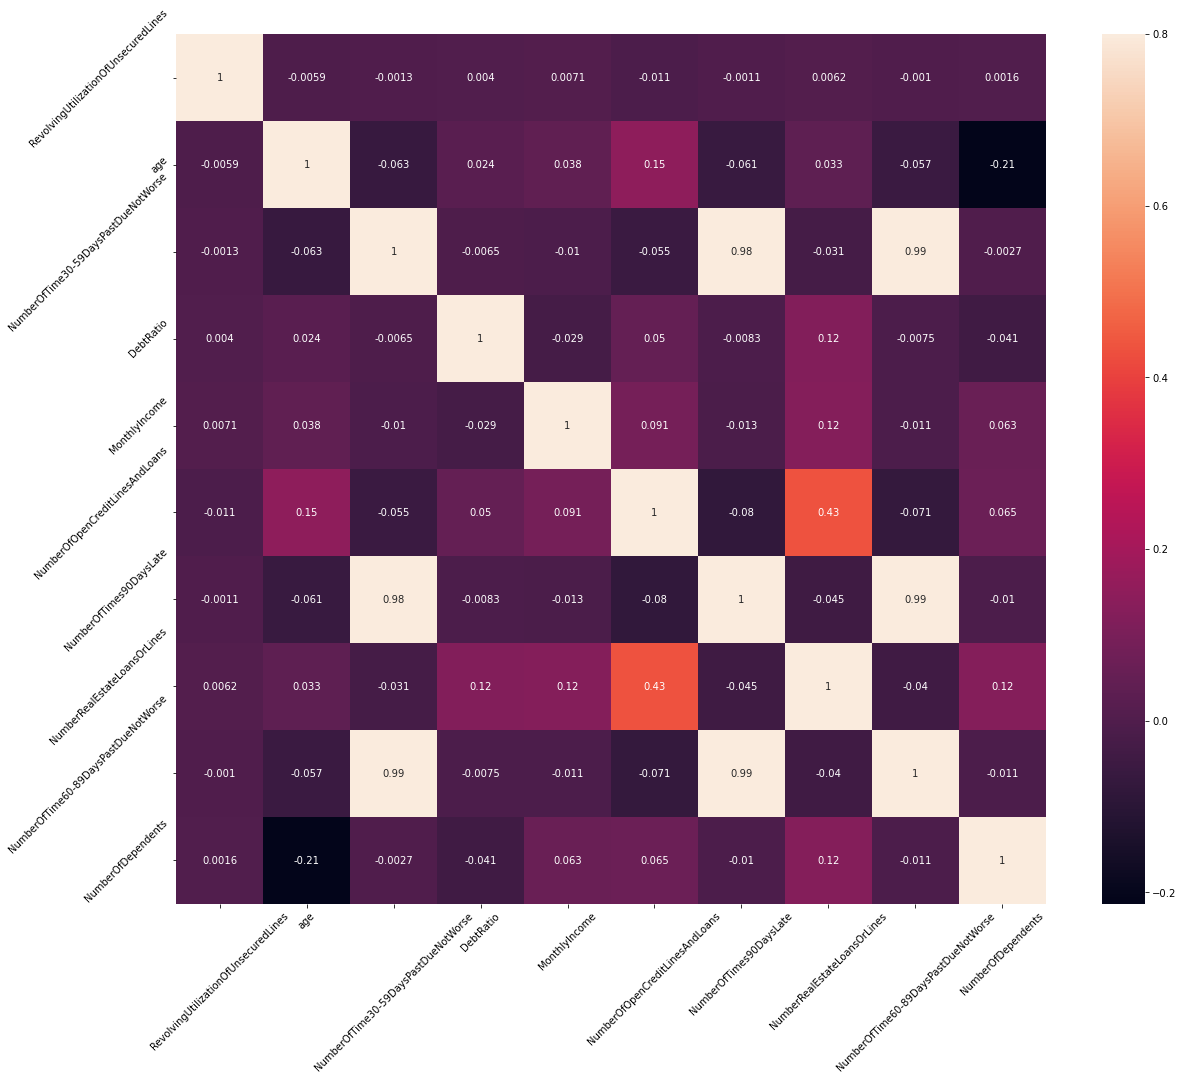

In [11]:
plt.figure(figsize=(20, 16))
plt.yticks(rotation=45)
heat = sns.heatmap(train.iloc[:, 2:].corr(), vmax=.8, square=True, annot=True)
xtict = heat.set_yticklabels(heat.get_yticklabels(), rotation = 45, fontsize = 10)
ttick = heat.set_xticklabels(heat.get_xticklabels(), rotation = 45, fontsize = 10)
plt.savefig(r"D:\liangkaimeng\picture\user_credit_score\heatmap.png")

# 